# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d50/0071d247cf8b12bab7ea835d2a820a859cb28ee4303fc1992a52f58d.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Athens, Attica, Greece**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(50,'0071d247cf8b12bab7ea835d2a820a859cb28ee4303fc1992a52f58d')

In [3]:
# command to download the file:
file ='data/C2A2_data/BinnedCsvs_d50/0071d247cf8b12bab7ea835d2a820a859cb28ee4303fc1992a52f58d.csv'
from IPython.display import HTML
link = '<a href="{0}" target = _blank>Click here to download {0}</a>'
HTML(link.format(file))

In [5]:
# Read the csv file
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d50/0071d247cf8b12bab7ea835d2a820a859cb28ee4303fc1992a52f58d.csv')
df['Data_Value'] = df['Data_Value'].apply(lambda x: x / 10.1)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] =pd.DatetimeIndex(df['Date']).day

#Removing the leap days: Feb 29
df = df[~((pd.DatetimeIndex(df['Date']).is_leap_year) & (pd.DatetimeIndex(df['Date']).month == 2) & (pd.DatetimeIndex(df['Date']).day == 29))]
df2005_2014 = df.loc[(df['Year']>=2005) & (df['Year']<=2014)]
df2015 = df.loc[(df['Year']>=2015)]

In [6]:
df1 = df2005_2014.groupby(['Month', 'Day'])['Data_Value'].agg(['min', 'max'])
df2 = df2015.groupby(['Month', 'Day'])['Data_Value'].agg(['min', 'max'])

In [7]:
dfmerge = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

In [8]:
dfmerge.head()

min_x      max_x      min_y      max_y
Month Day                                            
1     1   -15.247525  24.950495 -22.376238  12.277228
      2   -12.871287  19.009901 -16.534653  11.287129
      3   -14.059406  18.415842 -10.594059  14.158416
      4   -14.257426  18.811881  -4.356436  18.118812
      5   -21.584158  16.534653  -4.851485   7.920792

In [70]:
xaxis = pd.to_datetime((df2015.loc[df2015['Element']=='TMAX', 'Date']).sort_values().unique())
#xaxis = xaxis.strftime('%m-%d')
# xaxis.strftime('%b')
xaxis

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=365, freq=None)

In [9]:
def fxymin(row):
    if row['min_y']<row['min_x']:
        return row['min_y']
    else:
        return float('NaN')

In [10]:
def fxymax(row):
    if row['max_y']>row['max_x']:
        return row['max_y']
    else:
        return float('NaN')

In [11]:
dfmerge['checkmin'] = dfmerge.apply(fxymin, axis=1)
dfmerge['checkmax'] = dfmerge.apply(fxymax, axis=1)

In [12]:
dfmerge.head()

min_x      max_x      min_y      max_y   checkmin  checkmax
Month Day                                                                 
1     1   -15.247525  24.950495 -22.376238  12.277228 -22.376238       NaN
      2   -12.871287  19.009901 -16.534653  11.287129 -16.534653       NaN
      3   -14.059406  18.415842 -10.594059  14.158416        NaN       NaN
      4   -14.257426  18.811881  -4.356436  18.118812        NaN       NaN
      5   -21.584158  16.534653  -4.851485   7.920792        NaN       NaN

In [13]:
%matplotlib inline

In [14]:
import numpy as np

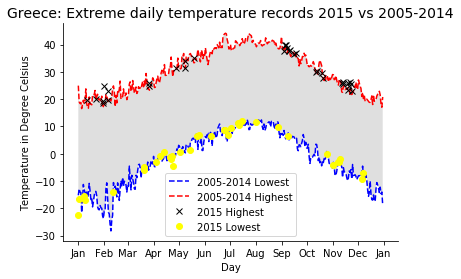

In [93]:
plt.figure()
plt.title("Greece: Extreme daily temperature records 2015 vs 2005-2014", fontsize=14)
#plt.suptitle("Extreme daily temperature records 2015 vs 2005-2014", fontsize=16)


plt.plot(xaxis, dfmerge['min_x'].as_matrix(),  '--r' , color='blue')
plt.plot(xaxis, dfmerge['max_x'].as_matrix(),  '--r' , color='red')
plt.plot(xaxis, dfmerge['checkmax'].as_matrix(),  'x' , color='black')
plt.plot(xaxis, dfmerge['checkmin'].as_matrix(),  'o' , color='yellow')

plt.gca().fill_between(xaxis, 
                       dfmerge['min_x'].as_matrix(), dfmerge['max_x'].as_matrix(), 
                       facecolor='grey', 
                       alpha=0.25)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Day')
plt.ylabel('Temperature in Degree Celsius')

#Removing the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(['2005-2014 Lowest', '2005-2014 Highest', '2015 Highest', '2015 Lowest'])
plt.savefig('foo.png', bbox_inches='tight')